# 3-神经网络前传 - 线性回归

我们先不介绍神经网络，我们先用代码实现一个非常简单的模型，线性回归，同时，我们也学习一个优化算法 - 梯度下降法，对这个模型进行优化。

可以说，线性回归是监督学习里面一个非常简单的模型，同时梯度下降也是深度学习中应用最广泛的优化算法，我们将从这里开始我们的深度学习之旅。

## 3.1、一元线性回归

一元线性模型非常简单，假设我们有变量 $x_i$ 和目标 $y_i$ ，每个 i 对应于一个数据点，希望建立一个模型

$$\hat{y_i} = wx_i + b$$

$\hat{y_i}$ 是我们预测的结果，希望通过 $\hat{y_i}$ 来拟合目标 $y_i$ ，通俗来讲就是找到这个函数拟合 $y_i$ 使得误差最小，即最小化

$$\dfrac{1}{n}\sum_{i=1}^{n}(\hat{y_i}-y_i)^2$$

那么如何最小化这个误差呢？

这里我们用到 **梯度下降**，这是我们接触到的第一个优化算法，非常简单，但是却非常强大，在深度学习中被大量使用，所以让我们从简单的例子出发了解梯度下降法的原理。

## 3.2、梯度下降法

在梯度下降法中，我们首先要明确梯度的概念，随后我们再了解如何使用梯度进行下降。

### 3.2.1、梯度

梯度在数学上就是导数，如果是一个多元函数，那么梯度就是偏导数。比如一个函数 $f(x, y)$ ，那么 $f$ 的梯度就是
$$(\dfrac{\partial f}{\partial x}, \dfrac{\partial f}{\partial y})$$

可以称为 $grad f(x, y)$ 或者 $\triangledown f(x_0, y_0)$ 。

下面这个图片是 $f(x) = x^2$ 这个函数在 $x = 1$ 处的梯度。

![](img/pt_3_1.jpg)

梯度由什么意义呢？从几何意义来讲，一个点的梯度值是这个函数变化最快的地方，具体来说，对于函数 $f(x, y)$ ，在点 $(x_0, y_0)$ 处，沿着梯度 $\triangledown f(x_0, y_0)$ 的方向，函数增长最快，也就是说沿着梯度的方向，我们能够更快地找到函数的极大值点，或者反过来沿着梯度的反方向，我们能够更快地找到函数的最小值点。

### 3.2.2、梯度下降

有了对梯度的理解，我们就能了解梯度下降法的原理了。上面我们需要最小化这个误差，也就是需要找到这个误差的最小值点，那么沿着梯度的反方向我们就能找到这个最小值点。

我们可以来看一个直观的解释。比如我们在一座大山上的某处位置，由于我们不知道怎么下山，于是决定走一步算一步，也就是在没走到一个位置的时候，求解当前位置的梯度，沿着梯度的负方向，也就是当前最陡峭的位置向下走一步，然后继续求解当前位置梯度，向这一步所在位置沿着最陡峭最易下山的位置走一步。这样一步步的走下去，一直走到觉得我们已经走到了山下。当然这样走下去，有可能不是到达山脚，而是到达了某个局部的山峰低处。

类比我们的问题，就是沿着梯度的反方向，我们不断改变 w 和 b 的值，最终找到一组最好的 w 和 b 使得误差最小。

在更新的时候，我们需要决定每次更新的幅度，比如在下山的例子中，我们需要每次往下走的那一步的长度，这个长度称为学习率，用 $\eta$ 表示，这个学习率非常重要，不同的学习率都会导致不同的结果，学习率太小会导致下降非常缓慢，学习率太大又会导致跳动非常明显，可以看看下面的例子：

![](img/pt_3_2.gif)

可以看到上面的学习率是比较合适的，而下面的学习率因为太大，导致不断跳动。

最后我们更新的公式就是

$$w: = w - \eta \dfrac{\partial f(w, b)}{\partial w}b := b - \eta \dfrac{\partial f(w, b)}{\partial b}$$

通过不断地迭代更新，最终我们能够找到一组最优的 w 和 b ，这就是梯度下降法的原理。
最后可以通过这张图形象地说明一下这个方法。

![](img/pt_3_3.jpg)

上面我们把原理介绍了一下，下面我们通过一个例子来进一步学习线性模型。

In [1]:
import torch as t
import numpy as np
from torch.autograd import Variable as v

t.manual_seed(2018)

In [2]:
# 读入数据 x 和 y
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168],
                    [9.779], [6.182], [7.59], [2.167], [7.042],
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)
y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573],
                    [3.366], [2.596], [2.53], [1.221], [2.827],
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

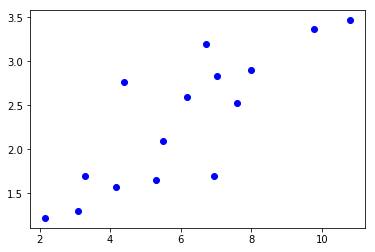

In [3]:
# 将数据的图像做出来
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(x_train, y_train, 'bo')

In [5]:
# 转换成 Tensor
x_train = t.from_numpy(x_train)
y_train = t.from_numpy(y_train)

# 定义参数 w 和 b
w = v(t.randn(1), requires_grad=True) # 随机初始化
b = v(t.zeros(1), requires_grad=True) # 使用 0 进行初始化

In [6]:
# 构建线性回归模型
x_train = v(x_train)
y_train = v(y_train)

def linear_model(x):
    return x * w + b

In [7]:
y_ = linear_model(x_train)

经过上面的步骤，我们就定义好了模型，在进行参数更新之前，我们可以先看看模型的输出结果长什么样

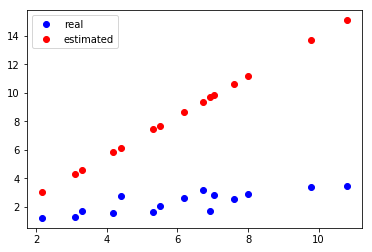

In [8]:
plt.plot(x_train.data.numpy(), y_train.data.numpy(), 'bo', label='real')
plt.plot(x_train.data.numpy(), y_.data.numpy(), 'ro', label='estimated')
plt.legend()

**思考：红色的点表示预测值，似乎排列成一条直线，请思考一下这些点是否在一条直线上？**

这个时候需要计算我们的误差函数，也就是

$$\dfrac{1}{n}\sum_{i=1}^{n}(\hat{y_i}-y_i)^2$$

In [10]:
# 计算误差
def get_loss(y_, y_train):
    return t.mean((y_ - y_train) ** 2)

loss = get_loss(y_, y_train)

In [11]:
# 打印一下看看 loss 的大小
print(loss)

tensor(45.3156)


定义好了误差函数，接下来我们需要计算 w 和 b 的梯度了，这时得益于 PyTorch 的自动求导，我们不需要手动去计算梯度，有兴趣的同学可以手动计算一下， w 和 b 的梯度分别是

$$\dfrac{\partial }{\partial w} = \dfrac{2}{n}\sum_{i=1}^{n}x_i(wx_i + b - y_i)\dfrac{\partial }{\partial b} = \dfrac{2}{n}\sum_{i=1}^{n}(wx_i + b - y_i)$$

In [12]:
# 自动求导
loss.backward()

In [13]:
# 查看 w 和 b 的梯度
print(w.grad)
print(b.grad)

tensor([ 87.3567])
tensor([ 12.3206])


In [14]:
# 更新一次参数
w.data = w.data - 1e-2 * w.grad.data
b.data = b.data - 1e-2 * b.grad.data

更新完参数之后，我们再一次看看模型输出的结果

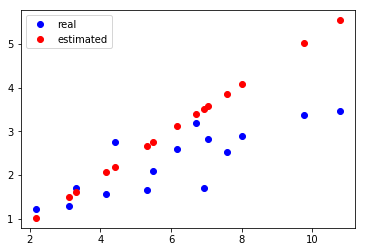

In [15]:
y_ = linear_model(x_train)
plt.plot(x_train.data.numpy(), y_train.data.numpy(), 'bo', label='real')
plt.plot(x_train.data.numpy(), y_.data.numpy(), 'ro', label='estimated')
plt.legend()

从上面的例子可以看到，更新之后红色的线跑到了蓝色的线下面，没有特别好的拟合蓝色的真实值，所以我们需要在进行几次更新

In [16]:
for e in range(10): # 进行 10 次更新
    y_ = linear_model(x_train)
    loss = get_loss(y_, y_train)
    
    w.grad.zero_() # 记得归零梯度
    b.grad.zero_() # 记得归零梯度
    loss.backward()
    
    w.data = w.data - 1e-2 * w.grad.data # 更新 w
    b.data = b.data - 1e-2 * b.grad.data # 更新 b 
    print('epoch: {}, loss: {}'.format(e, loss.data[0]))

epoch: 0, loss: 1.106460690498352
epoch: 1, loss: 0.28777116537094116
epoch: 2, loss: 0.27209919691085815
epoch: 3, loss: 0.2712911069393158
epoch: 4, loss: 0.27076074481010437
epoch: 5, loss: 0.2702381908893585
epoch: 6, loss: 0.2697184979915619
epoch: 7, loss: 0.2692013382911682
epoch: 8, loss: 0.26868686079978943
epoch: 9, loss: 0.26817506551742554


D:\anacondapy3.6\lib\site-packages\ipykernel_launcher.py:11: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  # This is added back by InteractiveShellApp.init_path()


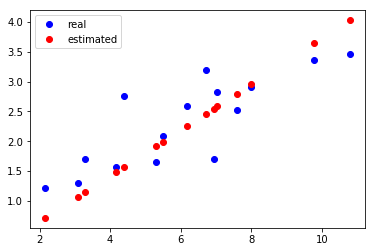

In [17]:
y_ = linear_model(x_train)
plt.plot(x_train.data.numpy(), y_train.data.numpy(), 'bo', label='real')
plt.plot(x_train.data.numpy(), y_.data.numpy(), 'ro', label='estimated')
plt.legend()

经过 10 次更新，我们发现红色的预测结果已经比较好的拟合了蓝色的真实值。
现在你已经学会了你的第一个机器学习模型了，再接再厉，完成下面的小练习。

**小练习：**

重启 notebook 运行上面的线性回归模型，但是改变训练次数以及不同的学习率进行尝试得到不同的结果。